Thematic Analysis on Your Bank Reviews Dataset

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models
import matplotlib.pyplot as plt

 Prepare the Data
 
 If not already, load your cleaned dataset:

In [2]:
# Load reviews (from your earlier script)
df = pd.read_csv("data/bank_reviews_sentiment_textblob.csv")

# Optional: sample a subset for faster analysis during prototyping
reviews = df["review"].dropna().tolist()

In [3]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)       # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)   # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

In [4]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Tokenize and remove stopwords
texts = [
    [word for word in clean_text(doc).split() if word not in stop_words]
    for doc in df['cleaned_review']
]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_model = models.LdaModel(corpus=corpus,
                            id2word=dictionary,
                            num_topics=5,    # you can tune this number
                            passes=10,
                            random_state=42)

# Print discovered themes
for idx, topic in lda_model.print_topics(-1):
    print(f"\n🧩 Topic {idx + 1}:")
    print(topic)


🧩 Topic 1:
0.077*"app" + 0.026*"good" + 0.017*"banking" + 0.017*"bank" + 0.017*"mobile" + 0.012*"work" + 0.011*"application" + 0.011*"use" + 0.010*"please" + 0.009*"amazing"

🧩 Topic 2:
0.052*"app" + 0.018*"nice" + 0.012*"like" + 0.012*"bank" + 0.011*"ever" + 0.010*"banking" + 0.010*"time" + 0.010*"worst" + 0.009*"even" + 0.007*"one"

🧩 Topic 3:
0.061*"app" + 0.042*"best" + 0.036*"dashen" + 0.029*"easy" + 0.027*"super" + 0.024*"fast" + 0.023*"use" + 0.019*"bank" + 0.017*"one" + 0.013*"banking"

🧩 Topic 4:
0.032*"app" + 0.023*"great" + 0.014*"work" + 0.013*"update" + 0.013*"doesnt" + 0.010*"always" + 0.007*"new" + 0.007*"works" + 0.007*"better" + 0.006*"sometimes"

🧩 Topic 5:
0.023*"app" + 0.019*"banking" + 0.017*"bank" + 0.011*"services" + 0.010*"good" + 0.010*"bad" + 0.009*"features" + 0.008*"dashen" + 0.008*"super" + 0.008*"like"


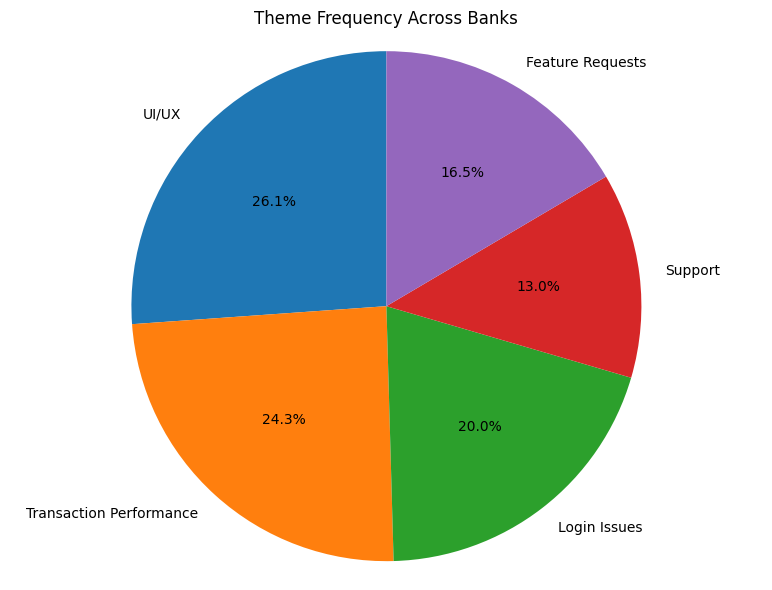

In [8]:

themes = ['UI/UX', 'Transaction Performance', 'Login Issues', 'Support', 'Feature Requests']
frequencies = [26.1, 24.3, 20.0, 13.0, 16.5]

# Plot
plt.figure(figsize=(8, 6))
plt.pie(frequencies, labels=themes, autopct='%1.1f%%', startangle=90)
plt.title("Theme Frequency Across Banks")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()